In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from torchvision import datasets, transforms

import copy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tqdm




In [106]:
N, D_in, D_out = 1000, 2, 1


# m =1
X2 = []
y2 = []
for j in range(N):
    X2.append([])
    #y.append([])
    for i in range(D_out):
        X2[-1].append( 1 )
        X2[-1].append( np.random.uniform(low=-1000.0, high=1000.0, size=None) )
        y2.append( (X2[-1][-1]**2) / (2*X2[-1][-2])  )


X2 = torch.Tensor(X2)
y2 = torch.Tensor(y2)


# p =1
X3 = []
y3 = []
for j in range(N):
    X3.append([])
    #y.append([])
    for i in range(D_out):
        X3[-1].append( np.random.uniform(low=0.0, high=10.0, size=None) )
        X3[-1].append( 1 )
        y3.append( (X3[-1][-1]**2) / (2*X3[-1][-2])  )


X3 = torch.Tensor(X3)
y3 = torch.Tensor(y3)

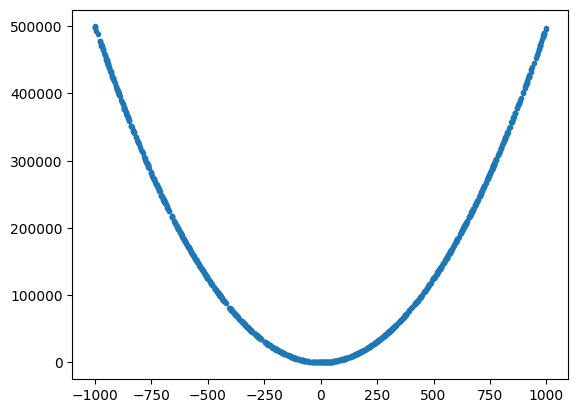

In [107]:
plt.scatter(X2[:,1] ,y2, marker='.', )
plt.show()

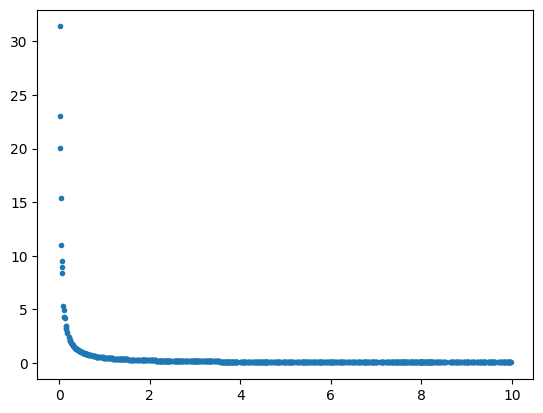

In [108]:
plt.scatter(X3[:,0] ,y3, marker='.')
plt.show()

In [ ]:

X = torch.load('KEdataX_1690854612.274382.pt')
y = torch.load('KEdataY_1690854612.2767599.pt')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
# X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size=0.7, shuffle=True)
# X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)




In [109]:

X2_test = torch.tensor(X2, dtype=torch.float32)
y2_test = torch.tensor(y2, dtype=torch.float32).reshape(-1, 1)
X3_test = torch.tensor(X3, dtype=torch.float32)
y3_test = torch.tensor(y3, dtype=torch.float32).reshape(-1, 1)

<ipython-input-109-8dfaa5b02617>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X2_test = torch.tensor(X2, dtype=torch.float32)
<ipython-input-109-8dfaa5b02617>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y2_test = torch.tensor(y2, dtype=torch.float32).reshape(-1, 1)
<ipython-input-109-8dfaa5b02617>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X3_test = torch.tensor(X3, dtype=torch.float32)
<ipython-input-109-8dfaa5b02617>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or

In [110]:
X_train

tensor([[ 729.6011,  182.6579],
        [ 265.2127,  419.4533],
        [ 145.7181,  957.8386],
        ...,
        [ 853.4783, -491.6523],
        [ 357.2281,  897.7043],
        [ 900.7529,  797.1464]])

In [101]:
X2_test

tensor([[   1.0000, -662.9954],
        [   1.0000, -736.6121],
        [   1.0000,  921.9907],
        ...,
        [   1.0000,  482.2796],
        [   1.0000, -389.7902],
        [   1.0000, -217.1315]])

In [102]:
X3_test


tensor([[933.1000,   1.0000],
        [385.3451,   1.0000],
        [ 86.3840,   1.0000],
        ...,
        [487.6792,   1.0000],
        [163.7502,   1.0000],
        [223.5232,   1.0000]])

In [ ]:
#default

"""
Bsize: 500 learningRate: 0.03 RMSE: 111.31 1000 loss: 515.4253401318177

"""
# for learningRate in range(10): #



for Bsize in [100]:
    # print('Bsize:', Bsize, end =' ')
    before_loss_twos =  torch.ones(Bsize, dtype=torch.float32)*2
    for learningRate in [ 5e-3  ]:
        # print('learningRate:', learningRate)
        # Define the model
        model = nn.Sequential(
            nn.Linear(2, 5),
            nn.LeakyReLU(),
            nn.Linear(5, 3),
            nn.LeakyReLU(),
            nn.Linear(3, 1)
            # nn.Linear(2, 3),
            # nn.LeakyReLU(),
            # nn.Linear(3, 2),
            # nn.LeakyReLU(),
            # nn.Linear(2, 1)
        )

        # loss function and optimizer
        loss_fn = nn.MSELoss()  # mean square error
        optimizer = optim.Adam(model.parameters(), lr=learningRate  )  # 10 loss: 5157042688.0

        n_epochs = 10000+1   # number of epochs to run
        batch_size = Bsize  # size of each batch
        batch_start = torch.arange(0, len(X_train), batch_size)

        # Hold the best model
        best_mse = np.inf   # init to infinity
        best_weights = None
        history = []
        history_train = []
        for epoch in range(n_epochs):
            model.train()
            before_loss_twos =  torch.ones(Bsize, dtype=torch.float32)*2
            with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
                bar.set_description(f"Epoch {epoch}")
                for start in bar:
                    # take a batch
                    X_batch = X_train[start:start+batch_size]
                    y_batch = y_train[start:start+batch_size]
                    # forward pass
                    y_pred = model(X_batch)

                    before_loss = y_pred/y_batch + y_batch/y_pred


                    loss = loss_fn(before_loss, before_loss_twos)
                    # backward pass
                    optimizer.zero_grad()
                    loss.backward()
                    # update weights
                    optimizer.step()
                    # print progress
                    bar.set_postfix(mse=float(loss))

            loss = float(loss)

            history_train.append(loss)
            # evaluate accuracy at end of each epoch
            model.eval()
            y_pred = model(X_test)

            before_loss = y_pred/y_test + y_test/y_pred
            before_loss_twos =  torch.ones(len(y_pred), dtype=torch.float32)*2
            mse = loss_fn(before_loss, before_loss_twos)

            mse = float(mse)

            history.append(mse)
            if mse < best_mse:
                best_mse = mse
                best_weights = copy.deepcopy(model.state_dict())

            if epoch % 50 == 0:
                print('epoch: %5d' % epoch, 'test_loss: %5d' % np.sqrt(mse), 'train_loss: %5d' % np.sqrt(loss))

        # restore model and return best accuracy
        model.load_state_dict(best_weights)
        # print("MSE: %.2f" % best_mse)
        # print("RMSE: %.2f" % np.sqrt(best_mse))
        print('Bsize:', Bsize ,'learningRate:', learningRate , "minimum_RMSE: %.2f" % np.sqrt(best_mse), 'epoch:',epoch, 'test_loss:', np.sqrt(mse), 'train_loss:', np.sqrt(loss))
        # print(y_pred[:10])
        # print(y_test[:10])
        plt.plot(history)
        plt.yscale('log')
        plt.title('test_loss')
        plt.show()

        plt.plot(history_train)
        plt.title('train_loss')
        plt.yscale('log')
        plt.show()
print('all done')
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([30000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:     0 test_loss:  2417 train_loss:   126
epoch:    50 test_loss:   500 train_loss:    25
epoch:   100 test_loss:   152 train_loss:     7
epoch:   150 test_loss:   246 train_loss:     8
epoch:   200 test_loss:   354 train_loss:    12
epoch:   250 test_loss:   280 train_loss:     7
epoch:   300 test_loss:   248 train_loss:     6
epoch:   350 test_loss:   367 train_loss:    14
epoch:   400 test_loss:   154 train_loss:     4
epoch:   450 test_loss:   426 train_loss:    17
epoch:   500 test_loss:   113 train_loss:    80
epoch:   550 test_loss:  1486 train_loss:    50
epoch:   600 test_loss:  2752 train_loss:    90
epoch:   650 test_loss:  3211 train_loss:   106
epoch:   700 test_loss:  1638 train_loss:    56
epoch:   750 test_loss:  3672 train_loss:   122
epoch:   800 test_loss:  3752 train_loss:   135
epoch:   850 test_loss: 11880 train_loss:   111
epoch:   900 test_loss:  7211 train_loss:   135
epoch:   950 test_loss:  1012 train_loss:    34
epoch:  1000 test_loss:  1217 train_loss

ValueError: ignored

RuntimeError: ignored

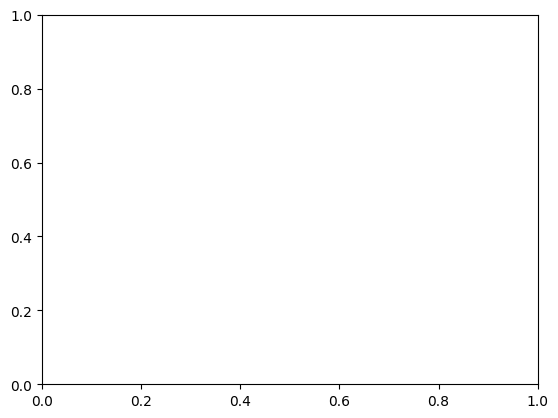

In [113]:
model.eval()
y_pred = model(X2)
plt.scatter(X2[:,1].cpu().detach().numpy(),y_pred.cpu().detach().numpy(), marker='*')
# plt.scatter(X2[:,1],y_pred, marker='*')
plt.show()


# plt.scatter(X2[:,1] ,y2, marker='.', )
# plt.show()


print('all done')

In [ ]:
y_pred

tensor([[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]], grad_fn=<AddmmBackward0>)

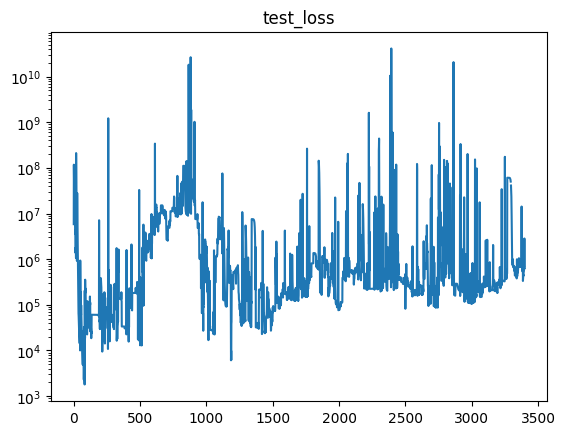

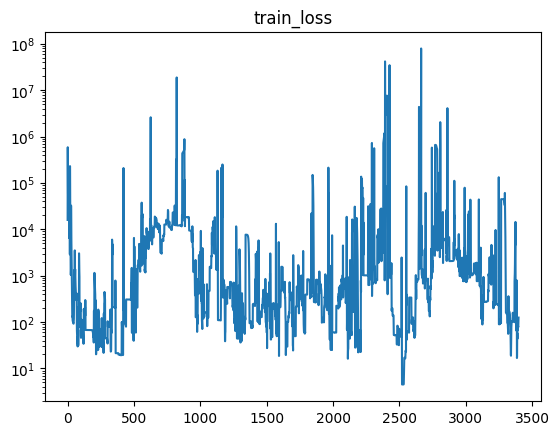

In [ ]:
        plt.plot(history)
        plt.yscale('log')
        plt.title('test_loss')
        plt.show()

        plt.plot(history_train)
        plt.title('train_loss')
        plt.yscale('log')
        plt.show()

In [ ]:
# when create new data

# N, D_in, H, D_out = 64, 1000, 100, 10
N, D_in, D_out = 100000, 2, 1

# 입력과 출력 위한 랜덤 텐서
X = []
y = []
for j in range(N):
    X.append([])
    #y.append([])
    for i in range(D_out):
        X[-1].append( np.random.uniform(low=0.0, high=1000.0, size=None) )
        X[-1].append( np.random.uniform(low=-1000.0, high=1000.0, size=None) )
        y.append( (X[-1][-1]**2) / (2*X[-1][-2])  )


X = torch.Tensor(X)
y = torch.Tensor(y)

# nn package를 이용하여 여러 층으로 정의된 모델 생성
# nn.Sequential은 다른 모듈을 담을 수 있는 모듈이며 담겨진 모듈은 순서대로 연결
# Linear 모듈은 곧 Affine 모듈

# Read data
# data = fetch_california_housing()
# X, y = data.data, data.target

# train-test split for model evaluation

import time
# >>> # Save to file
# >>> x = torch.tensor([0, 1, 2, 3, 4])
# >>> torch.save(x, 'tensor.pt')

torch.save(X, 'KEdataX_'+str(time.time())+'.pt' )
torch.save(y, 'KEdataY_'+str(time.time())+'.pt' )
